In [1]:
# Used to display all the matplotlib graphs inside the notebook
%matplotlib inline 

# Hiding the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set() # Setting the default seaborn style for all the plots

# Steps 1) and 2)

## Reading the data 

In [4]:
data = pd.read_csv('vehicle-1.csv') # Storing the given data into a data frame called as "data"

# Exploratory Data Analysis

## Number of records, structure of the file, number of attributes

In [5]:
data.shape # The data has got 195 rows and 24 columns

(846, 19)

In [6]:
data.head() # Checking the head of the data frame

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [7]:
# Checking for duplicates and removing the duplicates

print('The shape before removing the duplicates from the data set is :',data.shape)
data = data.drop_duplicates()
print('The shape after removing the duplicates from the data set is :',data.shape)

The shape before removing the duplicates from the data set is : (846, 19)
The shape after removing the duplicates from the data set is : (846, 19)


In [8]:
data.info() # Checking for the data type of each of the variables and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [9]:
data.nunique() # To check for the presence of categorical variables

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

## Checking for null values in each of the columns

In [10]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
# Replacing the null values in each of the columns using linear interpolation
columns = list(data.columns)
for column in columns:
    if data[column].count() != data.shape[0]:
        data[column] = data[column].interpolate(method="linear")

In [12]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### -There are no null values present in the data set

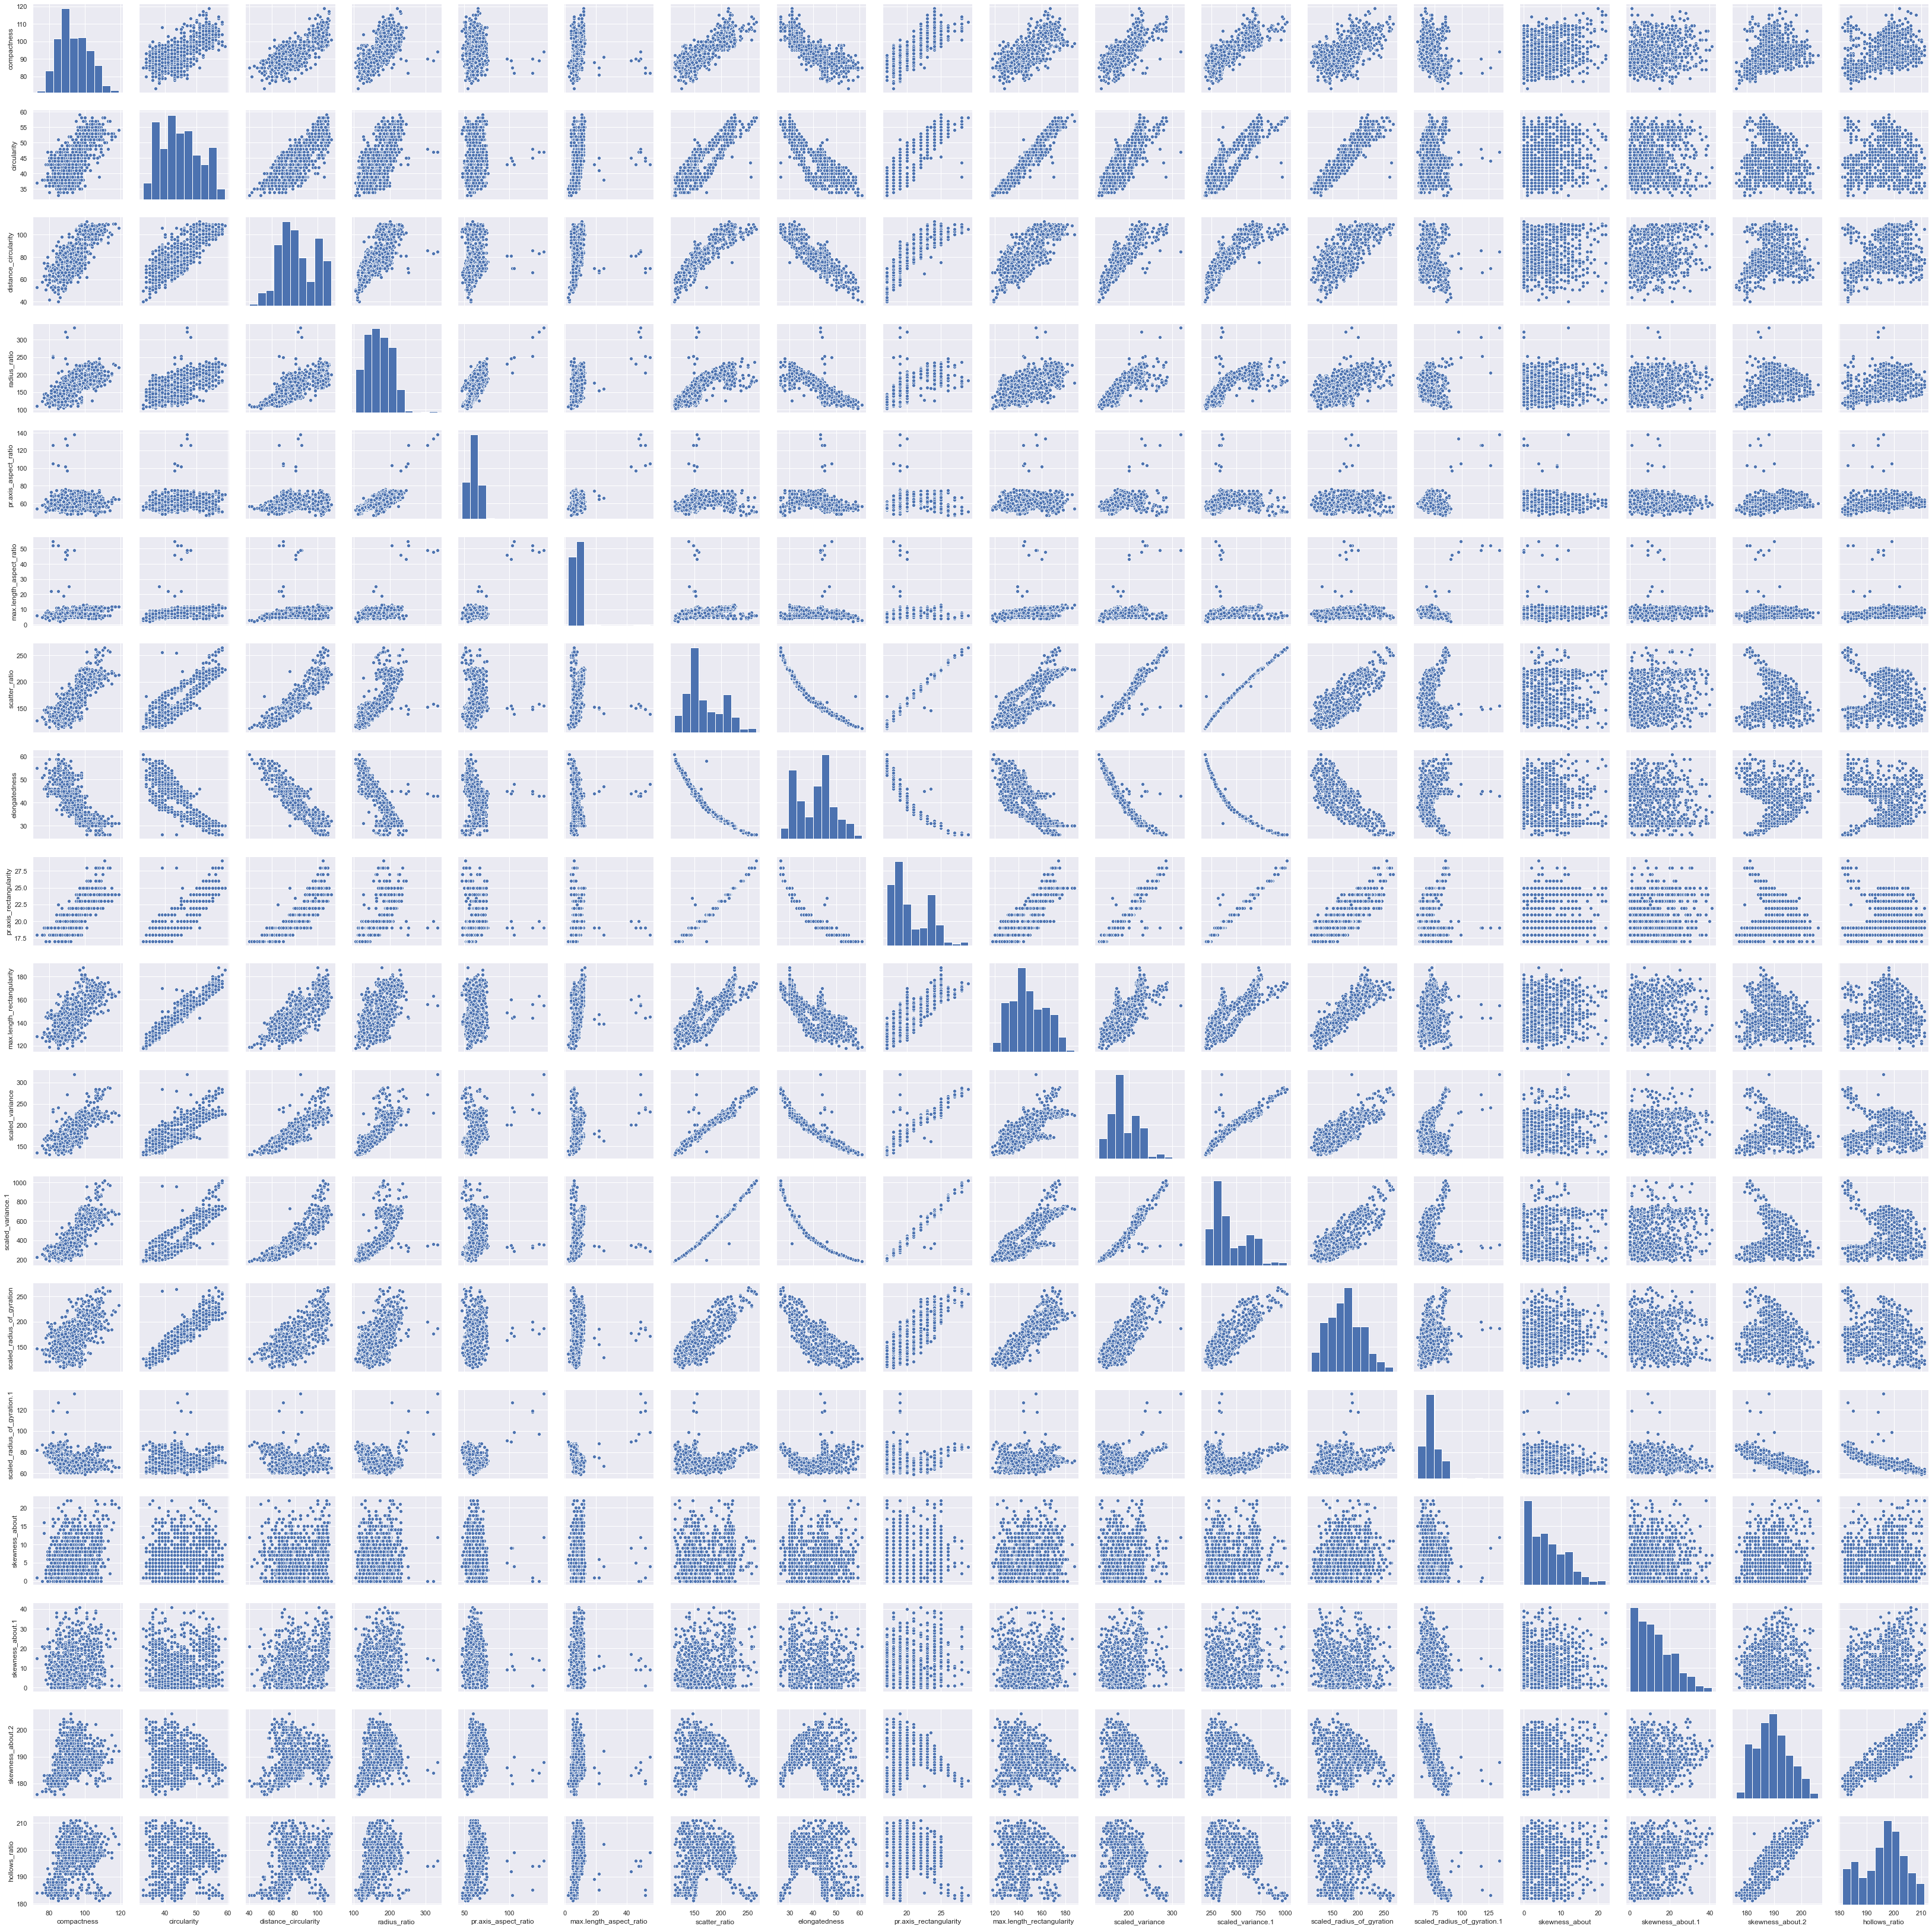

In [13]:
sns.pairplot(data)

## The five point summary of the continuous variables

In [14]:
data.describe().T 

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.829196    6.141147   33.0   40.00   
distance_circularity         846.0   82.103428   15.750522   40.0   70.00   
radius_ratio                 846.0  168.859338   33.520130  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.675532    7.883184   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.906028   33.195419  112.0  147.00   
elongatedness                846.0   40.939716    7.813501   26.0   33.00   
pr.axis_rectangularity       846.0   20.591608    2.593038   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.653073   31.373215  130.0  167.00   
scaled_variance.1            846.0  439.656028  176.624259  184.0  318.25   
scaled_radius_of_gyration    846.0  174.718676   32.547072  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.445626    7.475324   59.0   67.00   
skewness_about               846.0    6.357565    4.913402    0.0    2.00   
skewness_about.1             846.0   12.622931    8.950800    0.0    5.00   
skewness_about.2             846.0  188.911939    6.156124  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  587.0  1018.0  
scaled_radius_of_gyration    174.0  198.0   268.0  
scaled_radius_of_gyration.1   72.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [15]:
corr = data.corr() # Finding the correlation between the variables

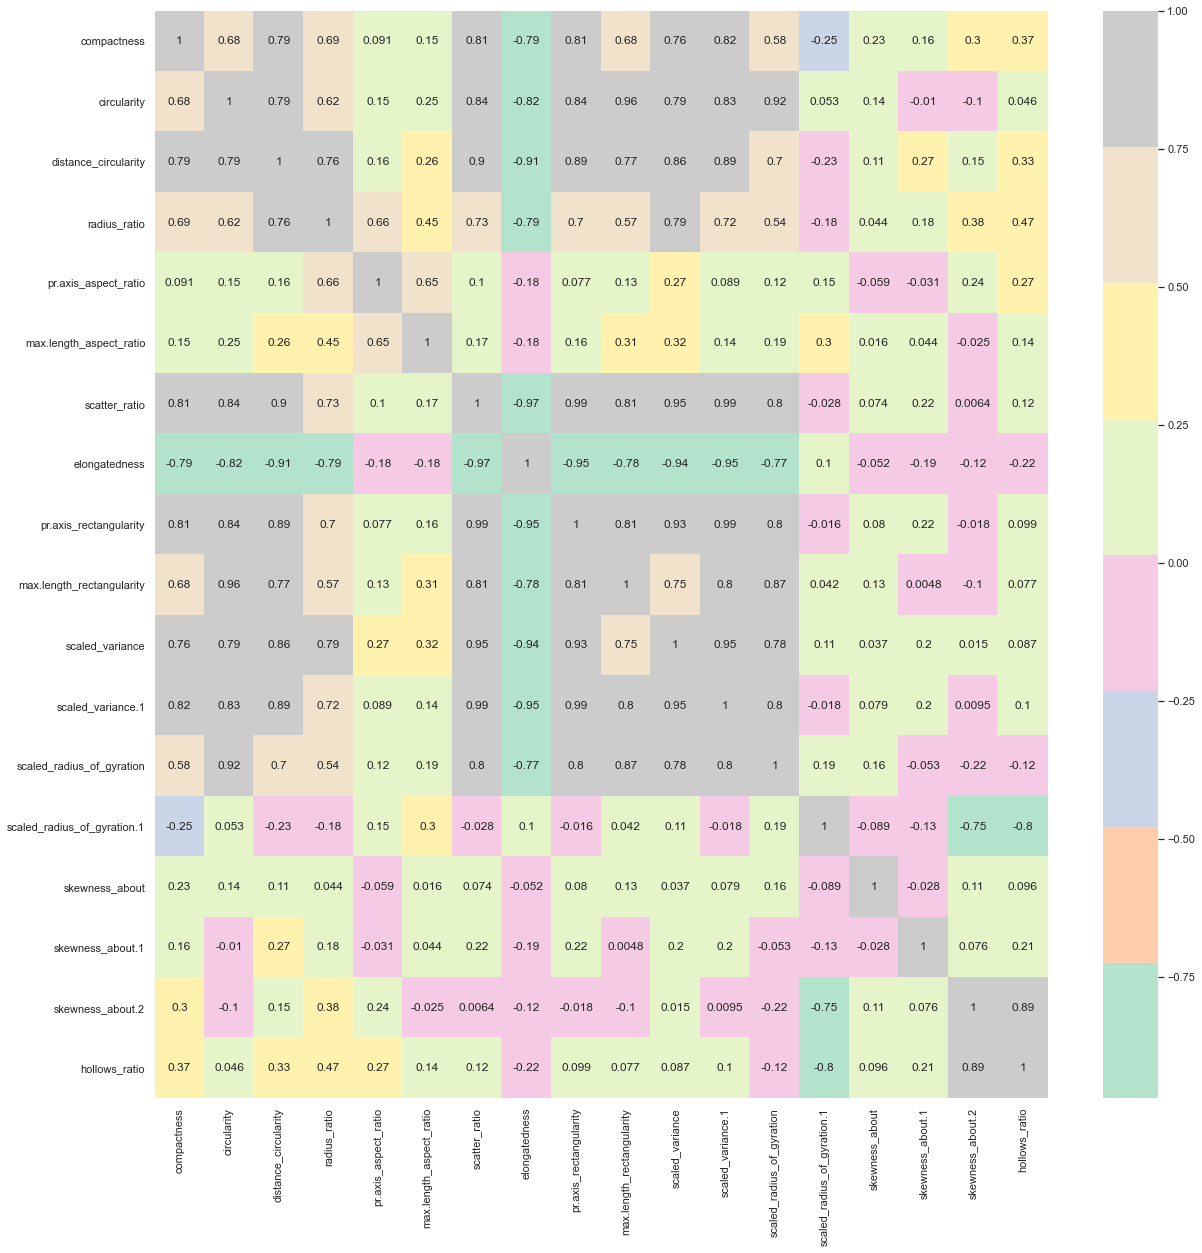

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True,ax=ax,cmap='Pastel2')

## Observing the distribution of the target variable

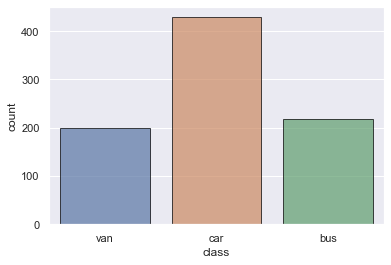

In [17]:
sns.countplot(data['class'],edgecolor = 'black', alpha = 0.7)

### Looks like the 'class' is normally distributed with not much of skewness 

In [18]:
# Getting the count of the distribution of records in each of the three classes namely van,car and bus
grouped_data = data.groupby('class').size()
print(grouped_data)

class
bus    218
car    429
van    199
dtype: int64


### - We can see that most of the silhouettes(429) have been classified as cars.
### - From the countplot, there is no significant skewness found.

## Distributions of the predictors (continuous)

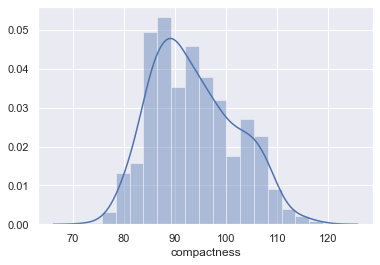

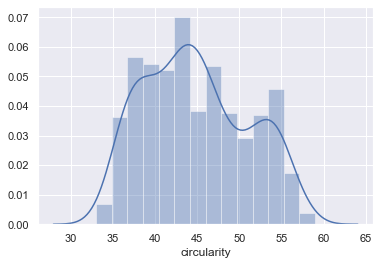

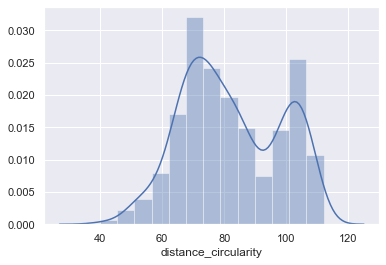

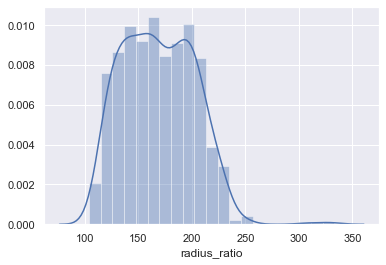

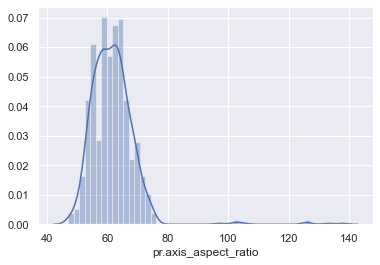

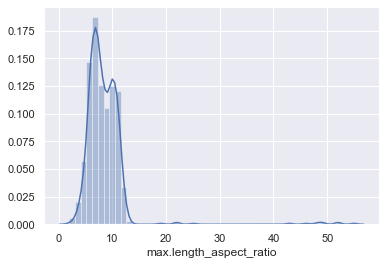

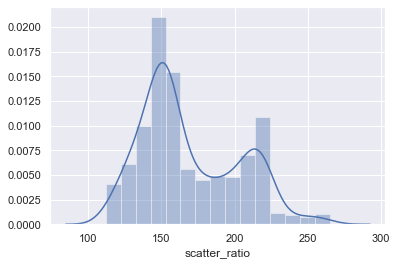

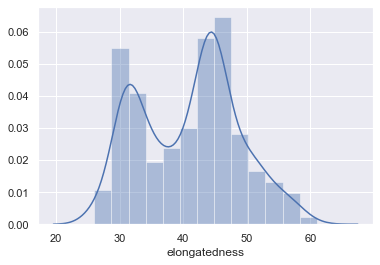

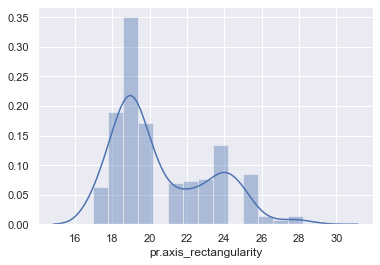

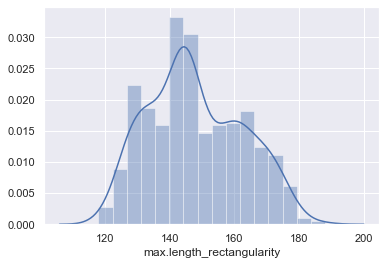

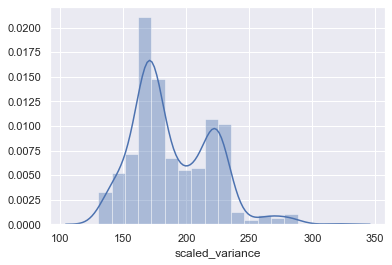

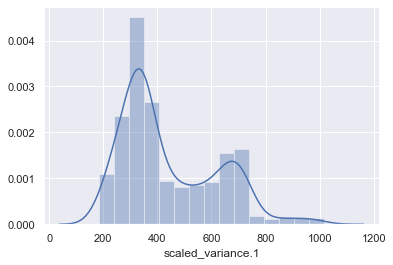

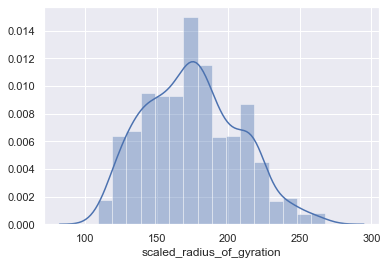

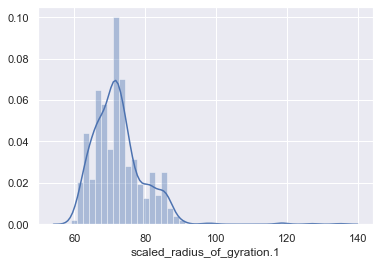

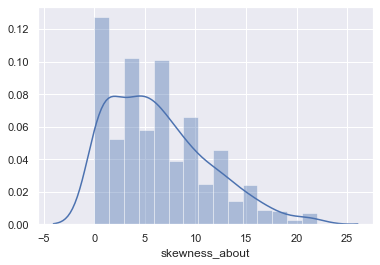

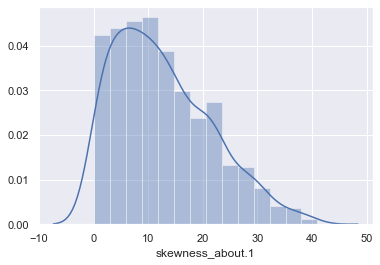

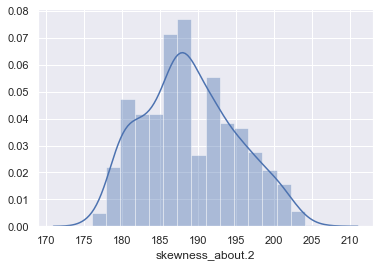

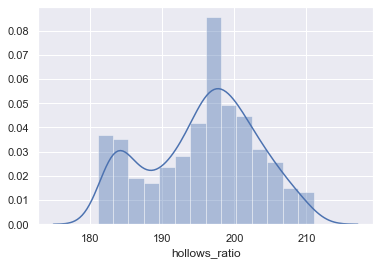

In [19]:
X = data.drop('class',axis=1)
c_cols = X.columns.to_list()
for column in c_cols :
    plt.close()
    sns.distplot(data[column])
    plt.show()

### 1) circularity, distance_circularity,scatter_ratio,max.length_aspect_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance_1 and hollows_ratio have bi-modal tendency.
### 2) radius_ratio and skewness_about have uniform distribution but skewness_about seems to be skewed a little towards the right hand side.
### 3) max.length_aspect ratio is very much skewed towards the right-hand side and hence might not be a good predictor
### 4) Rest of the variables have normal distributions with skewness values specified below.

In [20]:
# Checking for the skewness of the predictors

from scipy import stats
skews = []
for i in c_cols:
    skew = stats.skew(data[i])
    skews.append(skew)
for i in range(len(skews)) :
    print('The skewness of ',c_cols[i],'is: ',skews[i])

The skewness of  compactness is:  0.3805942876591023
The skewness of  circularity is:  0.2611710207884412
The skewness of  distance_circularity is:  0.10806452727329699
The skewness of  radius_ratio is:  0.39538232956793595
The skewness of  pr.axis_aspect_ratio is:  3.827693549639929
The skewness of  max.length_aspect_ratio is:  6.766369266562171
The skewness of  scatter_ratio is:  0.6061549089437783
The skewness of  elongatedness is:  0.04577681659792002
The skewness of  pr.axis_rectangularity is:  0.7599333226986721
The skewness of  max.length_rectangularity is:  0.25590440255890234
The skewness of  scaled_variance is:  0.6493762316894512
The skewness of  scaled_variance.1 is:  0.8383204415353366
The skewness of  scaled_radius_of_gyration is:  0.27831335786786143
The skewness of  scaled_radius_of_gyration.1 is:  2.0782176383308784
The skewness of  skewness_about is:  0.7768595076794985
The skewness of  skewness_about.1 is:  0.6844021076338295
The skewness of  skewness_about.2 is:  0.

### 1) All the variables are skewed towards the right-hand side, except 'hollows_ratio', that is skewed towards the left-hand side.
### 2) 'pr.axis_aspect_ratio','max.length_aspect_ratio' and 'scaled_radius_of_gyration.1' are very much skewed towards the right-hand side.

### ------------------------------------------OUTLIER TREATMENT------------------------------------------

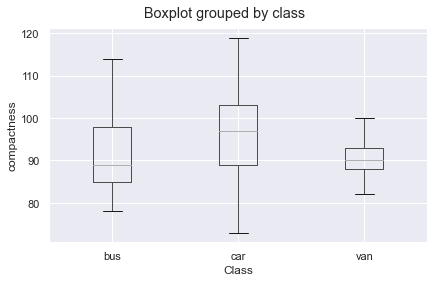

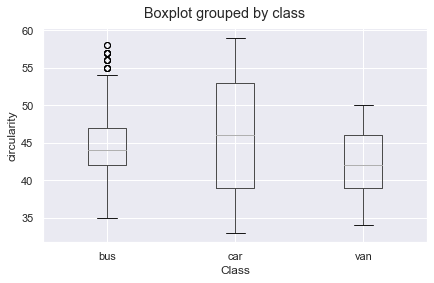

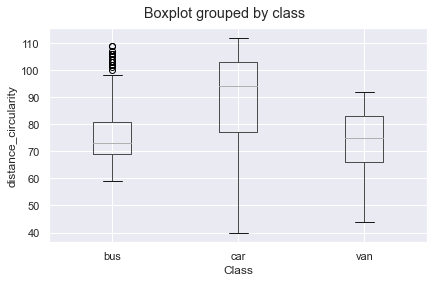

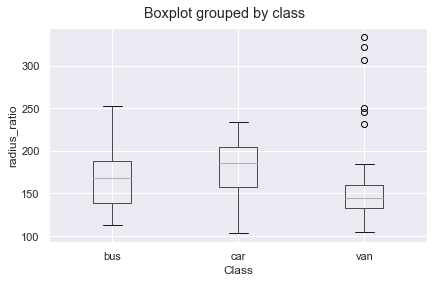

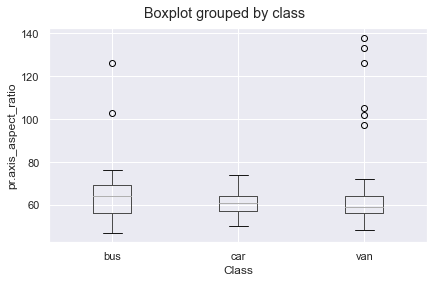

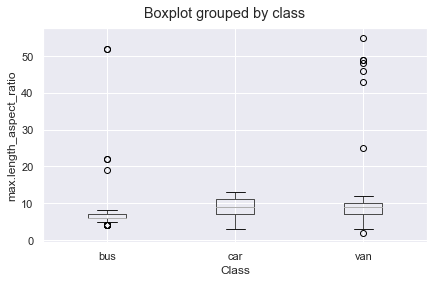

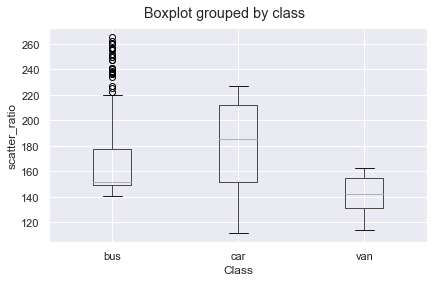

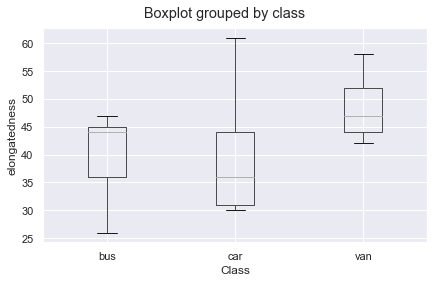

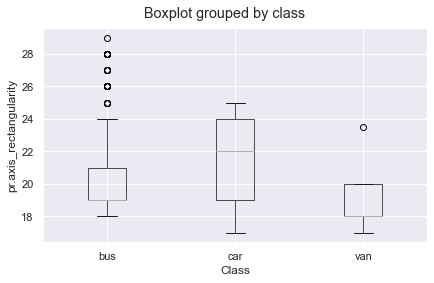

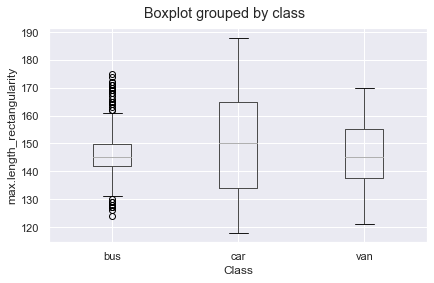

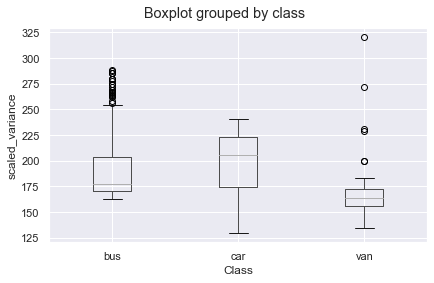

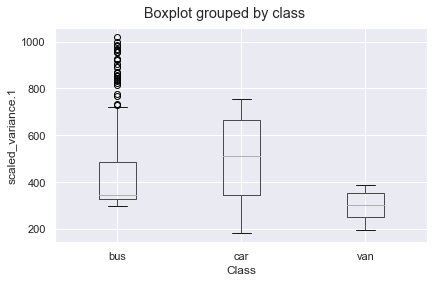

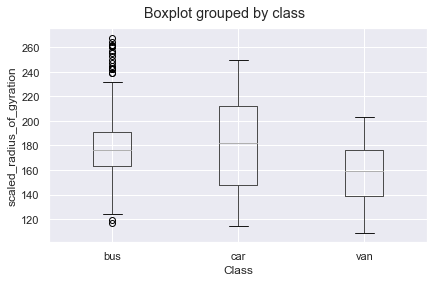

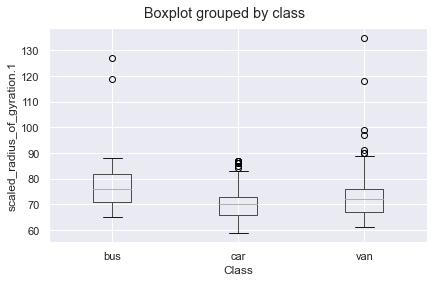

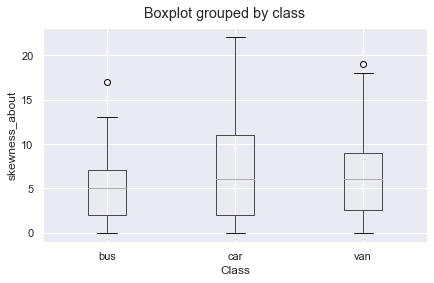

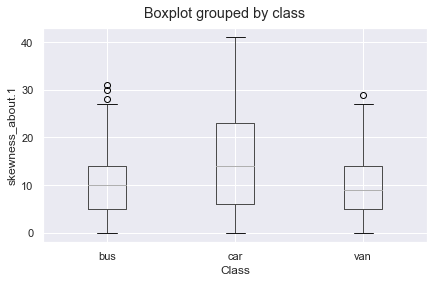

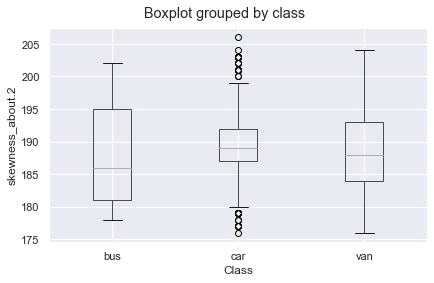

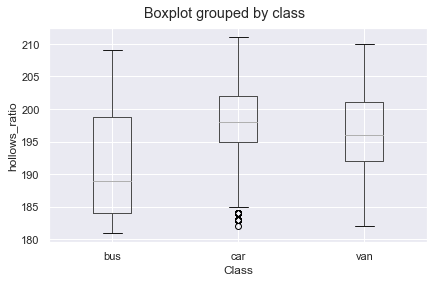

In [21]:
# Using boxplots to find out the outliers (Bivariate Analysis)

for i in c_cols:    
    data.boxplot(i,by='class')
    plt.tight_layout()
    plt.title('',y=1.08)
    plt.xlabel('Class')
    plt.ylabel(i)

### -I have replaced only the extreme points among the outliers with a logical value (the max value of that variable for that particular class(van,car or bus))

#### Outlier treatment for 'radius_ratio'

In [22]:
value = data[(data['radius_ratio']<275) & (data['class']=='van')]['radius_ratio'].max() 

In [23]:
value

250.0

In [24]:
data['radius_ratio'][data['radius_ratio']>275]=value # Replacing the outlier with the logical value

In [25]:
value = data[(data['radius_ratio']<200) & (data['class']=='van')]['radius_ratio'].max() 
value

185.0

In [26]:
data['radius_ratio'][(data['radius_ratio']>200) & (data['class']=='van')]=value # Replacing the outlier with the logical value

#### Outlier treatment for 'pr.axis_aspect_ratio'

In [27]:
value = data[(data['class']=='bus')&(data['pr.axis_aspect_ratio']<80)]['pr.axis_aspect_ratio'].max() 
value

76.0

In [28]:
data['pr.axis_aspect_ratio'][(data['pr.axis_aspect_ratio']>=value) & (data['class']=='bus')]=value

In [29]:
value = data[(data['class']=='van')&(data['pr.axis_aspect_ratio']<80)]['pr.axis_aspect_ratio'].max() 
value

72.0

In [30]:
data['pr.axis_aspect_ratio'][(data['pr.axis_aspect_ratio']>=value) & (data['class']=='van')]=value

#### Outlier treatment for 'max.length_aspect_ratio'

In [31]:
value = data[(data['class']=='bus')&(data['max.length_aspect_ratio']<15)]['max.length_aspect_ratio'].max() 
value

8

In [32]:
data['max.length_aspect_ratio'][(data['max.length_aspect_ratio']>=value) & (data['class']=='bus')]=value

In [33]:
value = data[(data['class']=='van')&(data['max.length_aspect_ratio']<20)]['max.length_aspect_ratio'].max() 
value

12

In [34]:
data['max.length_aspect_ratio'][(data['max.length_aspect_ratio']>value) & (data['class']=='van')]=value

#### Outlier treatment for 'scaled_variance'

In [35]:
value = data[(data['class']=='van')&(data['scaled_variance']<=225)]['scaled_variance'].max() 
value

200.0

In [36]:
data['scaled_variance'][(data['scaled_variance']>value) & (data['class']=='van')]=value

In [37]:
value = data[(data['class']=='van')&(data['scaled_variance']<200)]['scaled_variance'].max() 
value

183.0

In [38]:
data['scaled_variance'][(data['scaled_variance']>value) & (data['class']=='van')]=value

#### Outlier treatment for 'scaled_radius_of_gyration.1'

In [39]:
value = data[(data['class']=='bus') & (data['scaled_radius_of_gyration.1']<110)]['scaled_radius_of_gyration.1'].max()
value

88.0

In [40]:
data['scaled_radius_of_gyration.1'][(data['scaled_radius_of_gyration.1']>value) & (data['class']=='bus')]=value

In [41]:
value = data[(data['class']=='van') & (data['scaled_radius_of_gyration.1']<110)]['scaled_radius_of_gyration.1'].max()
value

99.0

In [42]:
data['scaled_radius_of_gyration.1'][(data['scaled_radius_of_gyration.1']>value) & (data['class']=='van')]=value

In [43]:
value = data[(data['class']=='van') & (data['scaled_radius_of_gyration.1']<95)]['scaled_radius_of_gyration.1'].max()
value

91.0

In [44]:
data['scaled_radius_of_gyration.1'][(data['scaled_radius_of_gyration.1']>value) & (data['class']=='van')]=value

#### Outlier treatment for 'skewness_about'

In [45]:
value = data[(data['class']=='bus') & (data['skewness_about']<15)]['skewness_about'].max()
value

13.0

In [46]:
data['skewness_about'][(data['skewness_about']>value) & (data['class']=='bus')]=value

In [47]:
value1 = data[(data['class']=='van') & (data['skewness_about']<20)]['skewness_about'].max()
value1

19.0

In [48]:
value = data[(data['class']=='van') & (data['skewness_about']<value1)]['skewness_about'].max()
value

18.0

In [49]:
data['skewness_about'][(data['skewness_about']>value) & (data['class']=='van')]=value

#### Outlier treatment for 'skewness_about.1'

In [50]:
value1 = data[(data['class']=='van') & (data['skewness_about.1']<30)]['skewness_about.1'].max()
value1

29.0

In [51]:
value = data[(data['class']=='van') & (data['skewness_about.1']<value1)]['skewness_about.1'].max()
value

27.0

In [52]:
data['skewness_about.1'][(data['skewness_about.1']>value) & (data['class']=='van')]=value

#### Outlier treatment for 'skewness_about.2'

In [53]:
value = data[(data['class']=='car') & (data['skewness_about.2']<205)]['skewness_about.2'].max()
value

204.0

In [54]:
data['skewness_about.2'][(data['skewness_about.2']>value) & (data['class']=='car')]=value

#### Outlier treatment for 'pr.axis_rectangularity'

In [55]:
value = data[(data['class']=='bus') & (data['pr.axis_rectangularity']<=24)]['pr.axis_rectangularity'].max()
value

24.0

In [56]:
data['pr.axis_rectangularity'][(data['pr.axis_rectangularity']>value) & (data['class']=='bus')]=value

In [57]:
value = data[(data['class']=='van') & (data['pr.axis_rectangularity']<23)]['pr.axis_rectangularity'].max()
value

20.0

In [58]:
data['pr.axis_rectangularity'][(data['pr.axis_rectangularity']>value) & (data['class']=='van')]=value

## Plotting the boxplots after outlier treatment

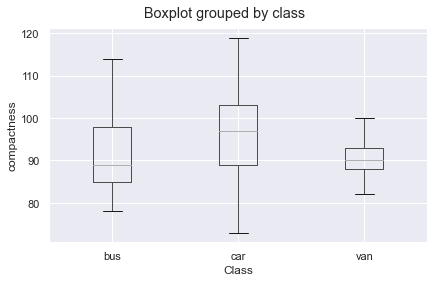

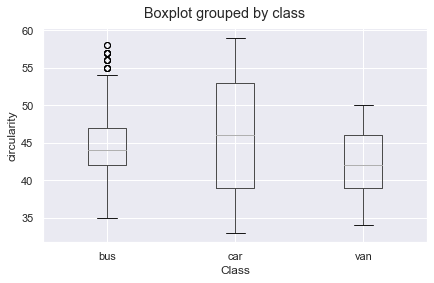

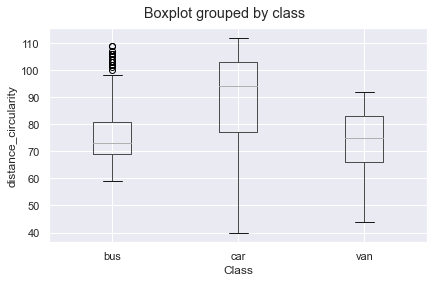

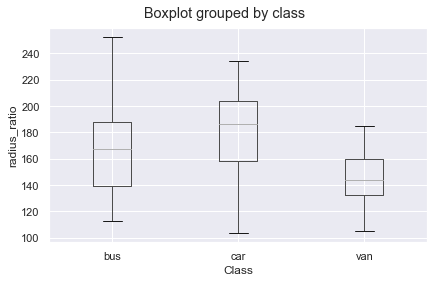

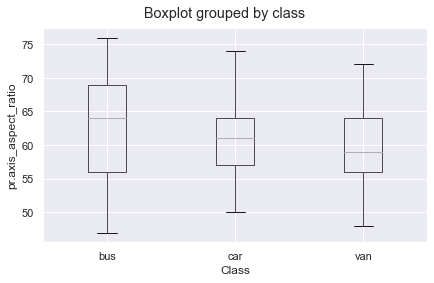

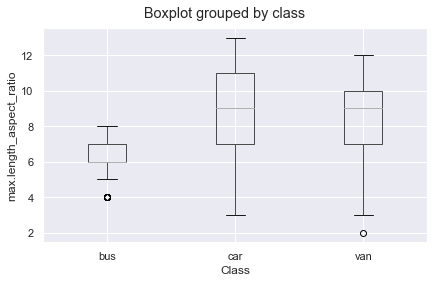

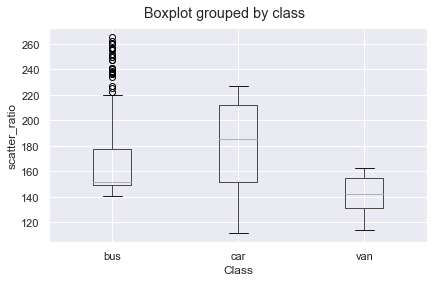

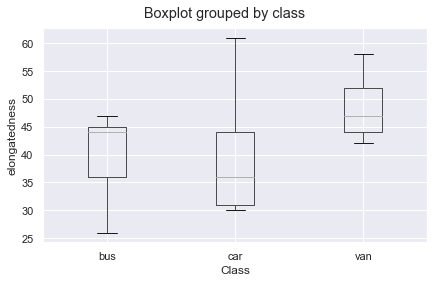

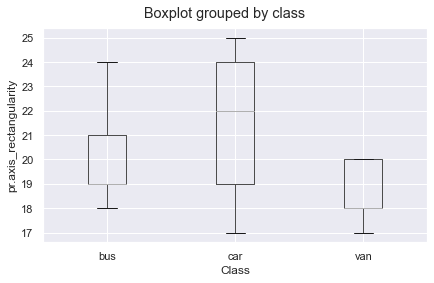

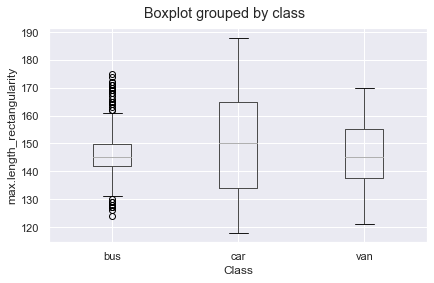

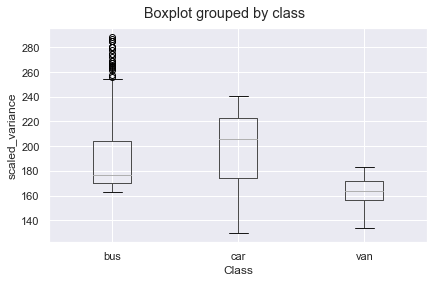

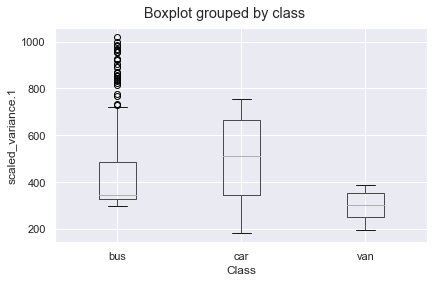

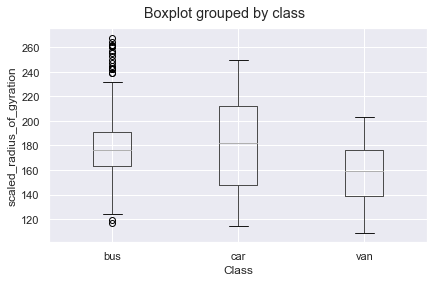

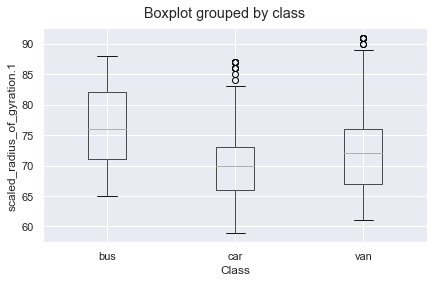

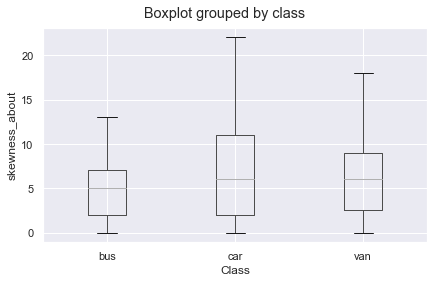

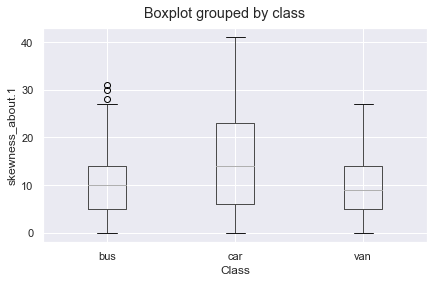

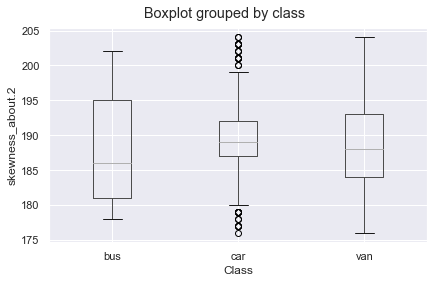

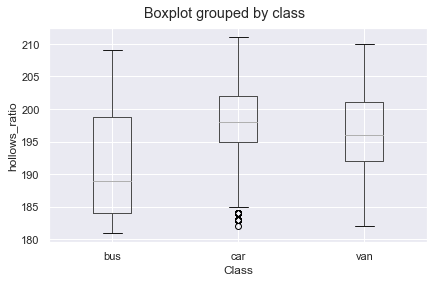

In [59]:
for i in c_cols:    
    data.boxplot(i,by='class')
    plt.tight_layout()
    plt.title('',y=1.08)
    plt.xlabel('Class')
    plt.ylabel(i)

### -The outliers are still present but there are no extreme points as such.

## Feature Selection using statistical tests

## ANOVA test (Categorical vs Continuous)

H0 : There is NO relation between the given variables (p > 0.05)

H1 : There is a relation between the given variables (p <= 0.05)


In [60]:
from scipy.stats import f_oneway
anova = []
for i in c_cols :
    l = data.groupby('class')[i].apply(list)
    res = f_oneway(*l)
    anova.append(i +': '+str(res[1]))
for i in anova:
    print(i)

compactness: 1.8335286775037138e-19
circularity: 1.8346931285412939e-13
distance_circularity: 7.361444828394872e-41
radius_ratio: 1.155202403137025e-42
pr.axis_aspect_ratio: 5.422135279036485e-08
max.length_aspect_ratio: 2.8137646830267802e-49
scatter_ratio: 3.964309096548522e-48
elongatedness: 1.8993729596929006e-55
pr.axis_rectangularity: 6.674260165050321e-52
max.length_rectangularity: 0.00017580561882779507
scaled_variance: 8.267835888111556e-47
scaled_variance.1: 2.2297830840938245e-44
scaled_radius_of_gyration: 9.691418756191155e-18
scaled_radius_of_gyration.1: 4.799408448920656e-38
skewness_about: 4.497799814716747e-08
skewness_about.1: 2.9064739699330456e-17
skewness_about.2: 0.005677770011004094
hollows_ratio: 1.2013700644761406e-24


###  -By looking at the p-values for each of the variables, all the variables have importance. So, we do not have to drop any.

## Saving the dataframe as a pickle file so that the data can be loaded quickly and used in the models

In [61]:
data.to_pickle('object_detection_data.pickle')

In [62]:
detection_data = pd.read_pickle('object_detection_data.pickle')
detection_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                  76.0                        8          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         88.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [63]:
detection_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## -The data has been processed and can be used in the models. 

# --------------------------------------------------------------------------------------------------------------

# Machine Learning

### Supervised Learning using SVM

In [64]:
# Separating the target variable from the predictor variables

x = detection_data.drop('class',axis=1).values
y = detection_data[['class']].values
y = y.reshape(len(y),1)

print('The shape of X is: ',x.shape)
print('The shape of y is: ',y.shape)

The shape of X is:  (846, 18)
The shape of y is:  (846, 1)


### Converting the features into their z-scores (Scaling)

In [65]:
from scipy.stats import zscore

X = data.drop('class',axis=1)
X_scaled = X.apply(zscore)
X = X_scaled.values

print('The shape of X is: ',X.shape)
print('The shape of y is: ',y.shape)
X_scaled.head()

The shape of X is:  (846, 18)
The shape of y is:  (846, 1)


compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.516626              0.056957      0.307225   
1    -0.325470    -0.623900              0.120485     -0.849888   
2     1.254193     0.842491              1.518090      1.276699   
3    -0.082445    -0.623900             -0.006571     -0.286968   
4    -1.054545    -0.135103             -0.768901      1.151605   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.873287                 0.882346      -0.208165   
1             -0.744632                 0.406891      -0.600017   
2              0.826119                 0.882346       1.148246   
3              0.302536                 0.406891      -0.750729   
4              2.571398                -0.068564      -0.600017   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.135779               -0.206215                   0.758332   
1       0.519957               -0.622582                  -0.344578   
2      -1.144814                1.042886                   0.689401   
3       0.648016               -0.622582                  -0.344578   
4       0.519957               -0.622582                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.396899          -0.343622                   0.285335   
1        -0.591543          -0.621211                  -0.513981   
2         1.127810           1.106640                   1.392079   
3        -0.915949          -0.740178                  -1.467011   
4         1.711741          -0.649536                   0.408306   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.343911       -0.071777          0.377952   
1                    -0.039889        0.540563          0.154274   
2                     0.112122        1.561130         -0.404920   
3                    -1.407988       -0.071777         -0.293081   
4                     2.392286        0.540563         -0.181242   

   skewness_about.2  hollows_ratio  
0         -0.310687       0.183957  
1          0.014712       0.452977  
2         -0.147987       0.049447  
3          1.641708       1.529056  
4         -1.449584      -1.699181

## 3) Splitting the data into training and test set in the ratio of 70:30 respectively 

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=14)

print('The shape of X_train is: ',X_train.shape)
print('The shape of y_train is: ',y_train.shape)
print('The shape of X_test is: ',X_test.shape)
print('The shape of y_test is: ',y_test.shape)

The shape of X_train is:  (592, 18)
The shape of y_train is:  (592, 1)
The shape of X_test is:  (254, 18)
The shape of y_test is:  (254, 1)


## 4) Train a Support vector machine using the train set and get the accuracy on the test set

##  --- Support Vector Machines ---

In [67]:
from sklearn import svm
model_svm = svm.SVC(C=20, kernel='rbf', gamma=0.01)

print(model_svm)

model_SVM = model_svm.fit(X_train,y_train)
y_pred = model_SVM.predict(X_test)

SVC(C=20, gamma=0.01)


### Confusion Matrix and Classification report

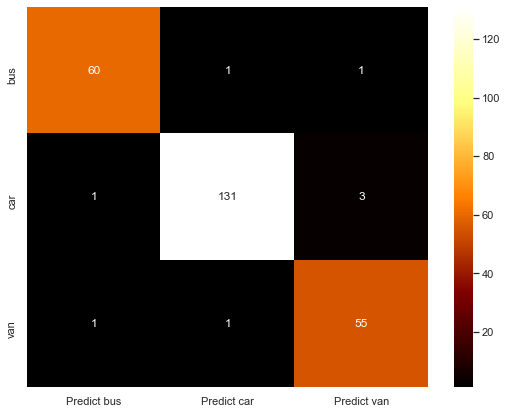

In [68]:
from sklearn import metrics

cm_svm=metrics.confusion_matrix(y_test, y_pred, labels=['bus', 'car','van'])

df_cm_svm = pd.DataFrame(cm_svm, index = [i for i in ["bus","car","van"]],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm_svm, annot=True,fmt='g',cmap='afmhot')

In [69]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.97      0.97      0.97        62
         car       0.98      0.97      0.98       135
         van       0.93      0.96      0.95        57

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.96       254
weighted avg       0.97      0.97      0.97       254



In [70]:
accuracy_svm = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_svm = float(accuracy_svm)*100

In [71]:
print('The Accuracy of the SVM model is :',accuracy_percentage_svm,'%')

The Accuracy of the SVM model is : 97.0 %


In [72]:
score_svm = np.round((model_svm.score(X_test,y_test)*100),2)
print('The score of the SVM model on the test data is: ',score_svm,'%')

The score of the SVM model on the test data is:  96.85 %


## 5) Perform K-fold cross validation and get the cross validation score of the model

### --- K-fold-cross validation ---

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=19, shuffle=True)
k_fold_accuracy_scores = cross_val_score(model_svm,X,y,cv=cv)
k_fold_accuracy_score_svm = round((k_fold_accuracy_scores*100).mean(),2)
print('\nThe final average accuracy of the SVM model using K-fold-cross validation is: ',k_fold_accuracy_score_svm,'%')


The final average accuracy of the SVM model using K-fold-cross validation is:  97.88 %


## 6) and 7) Unsupervised Learning - Principal Component Analysis

In [74]:
from sklearn.decomposition import PCA

# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=X.shape[1])

# fitting the data
pca_fit = pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# 18 columns present in X are now represented by 18 Principal components present in reduced_X
print(np.round(reduced_X[0:3],2))

[[-0.57 -0.62  0.23  0.97 -0.94  1.61 -0.3  -0.51 -0.59 -0.14  0.14 -0.06
   0.39  0.11  0.1   0.04 -0.04  0.03]
 [ 1.52 -0.41  0.54 -1.09 -0.46  0.11  0.18  0.1   0.29  0.35  0.33 -0.26
  -0.01  0.1   0.1   0.07  0.01 -0.01]
 [-3.94  0.24  1.14  0.16  0.76  0.73  0.73  0.26 -0.16  0.53  0.07 -0.18
  -0.   -0.   -0.06  0.05 -0.1   0.02]]


In [75]:
# The Amount of variance explained by each principle componnent
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 54% and 18% variance of data respectively

[0.54 0.18 0.07 0.06 0.05 0.04 0.02 0.01 0.01 0.01 0.   0.   0.   0.
 0.   0.   0.   0.  ]


In [76]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[54.31 72.57 79.15 85.62 90.45 94.35 96.14 97.4  98.1  98.61 98.96 99.22
 99.44 99.63 99.77 99.89 99.97 99.99]


### What is the optimal number of Principal Components??

Text(0, 0.5, '% Variance explained')

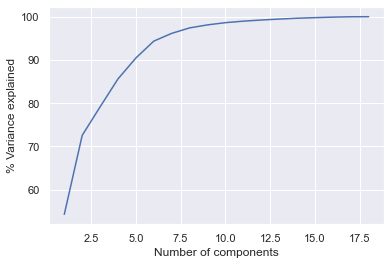

In [77]:
# By Looking at below graph we can see that >6 components are explaining maximum Variance in the dataset
plt.plot( range(1,19), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

#### The elbow occurs at 6th principal component

In [78]:
# Choosing 6-principal components based on above graph
pca = PCA(n_components=6)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# 18 Columns present in X are now represented by 6-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[-0.57 -0.62  0.23  0.97 -0.94  1.61]
 [ 1.52 -0.41  0.54 -1.09 -0.46  0.11]
 [-3.94  0.24  1.14  0.16  0.76  0.73]
 [ 1.53 -3.03  0.48 -0.1  -0.64 -0.43]
 [ 0.51  2.13 -0.37  2.52  0.96  2.9 ]
 [-4.91  4.44 -0.91 -0.74  1.82 -2.2 ]
 [ 0.81 -2.23  1.74  0.77  1.54 -0.54]
 [ 1.97 -1.51  0.79  1.18 -1.11 -0.28]
 [ 4.39 -3.3  -0.53 -0.1  -0.4  -0.7 ]
 [-1.03 -1.8  -0.31 -0.66 -1.17 -0.62]]


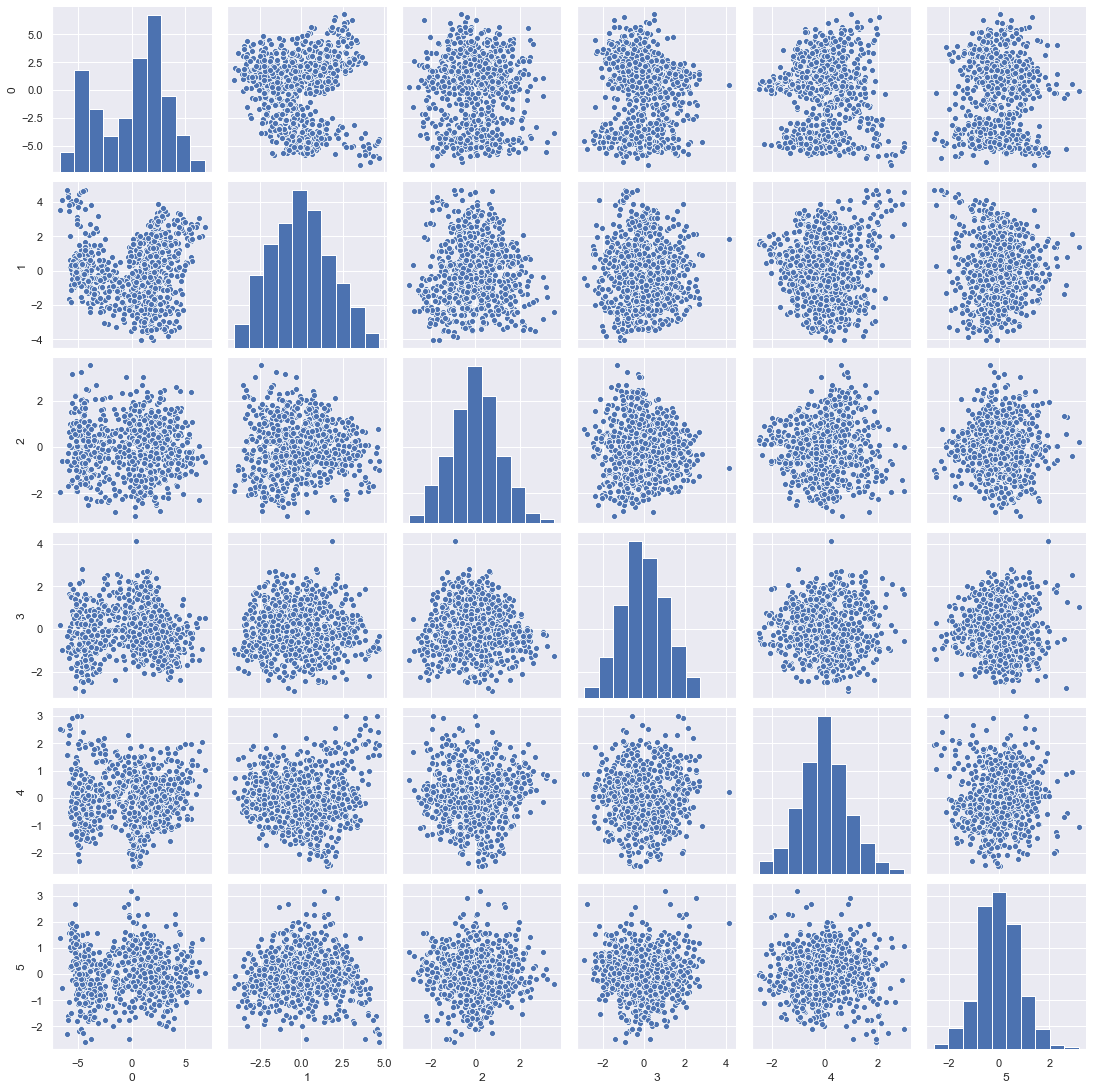

In [79]:
sns.pairplot(pd.DataFrame(reduced_X))

In [80]:
PCA_detection_data=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
PCA_detection_data['Class']=y
PCA_detection_data.head()

PC1       PC2       PC3       PC4       PC5       PC6 Class
0 -0.574268 -0.616102  0.228495  0.973235 -0.942026  1.609955   van
1  1.515964 -0.408973  0.536933 -1.089954 -0.460503  0.110783   van
2 -3.935163  0.237351  1.140132  0.162865  0.761758  0.732100   car
3  1.531311 -3.031421  0.479665 -0.099789 -0.640498 -0.425326   van
4  0.512643  2.131689 -0.372641  2.524137  0.964139  2.904063   bus

In [81]:
X_PCA = PCA_detection_data.drop('Class',axis=1)
y_PCA = PCA_detection_data[['Class']].values
y_PCA = y_PCA.reshape(len(y),1)
print('The shape of X_PCA is: ',X_PCA.shape)
print('The shape of y_PCA is: ',y_PCA.shape)
X_PCA.head()

The shape of X_PCA is:  (846, 6)
The shape of y_PCA is:  (846, 1)


PC1       PC2       PC3       PC4       PC5       PC6
0 -0.574268 -0.616102  0.228495  0.973235 -0.942026  1.609955
1  1.515964 -0.408973  0.536933 -1.089954 -0.460503  0.110783
2 -3.935163  0.237351  1.140132  0.162865  0.761758  0.732100
3  1.531311 -3.031421  0.479665 -0.099789 -0.640498 -0.425326
4  0.512643  2.131689 -0.372641  2.524137  0.964139  2.904063

In [82]:
X_train_PCA,X_test_PCA,y_train_PCA,y_test_PCA = train_test_split(X_PCA,y_PCA,test_size=0.3,random_state=14)

print('The shape of X_train_PCA is: ',X_train_PCA.shape)
print('The shape of y_train_PCA is: ',y_train_PCA.shape)
print('The shape of X_test_PCA is: ',X_test_PCA.shape)
print('The shape of y_test_PCA is: ',y_test_PCA.shape)

The shape of X_train_PCA is:  (592, 6)
The shape of y_train_PCA is:  (592, 1)
The shape of X_test_PCA is:  (254, 6)
The shape of y_test_PCA is:  (254, 1)


##  --- Support Vector Machines ---

In [83]:
from sklearn import svm
model_svm_pca = svm.SVC(C=20, kernel='rbf', gamma=0.01)

print(model_svm_pca)

model_SVM_PCA = model_svm_pca.fit(X_train_PCA,y_train_PCA)
y_pred_PCA = model_SVM_PCA.predict(X_test_PCA)

SVC(C=20, gamma=0.01)


### Confusion Matrix and Classification report

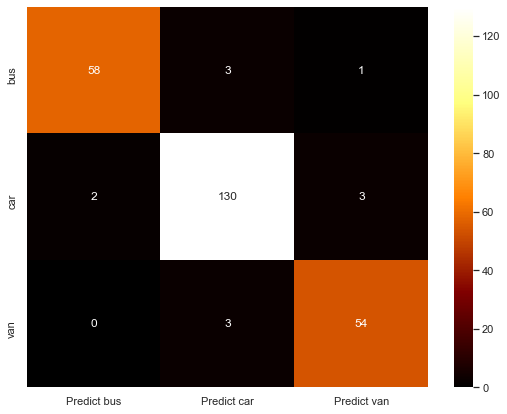

In [84]:
from sklearn import metrics

cm_svm_pca=metrics.confusion_matrix(y_test_PCA, y_pred_PCA, labels=['bus', 'car','van'])

df_cm_svm_pca = pd.DataFrame(cm_svm_pca, index = [i for i in ["bus","car","van"]],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm_svm_pca, annot=True,fmt='g',cmap='afmhot')

In [85]:
print(metrics.classification_report(y_test_PCA,y_pred_PCA))
accuracy_svm = metrics.classification_report(y_test_PCA, y_pred_PCA).split()[-2]
accuracy_percentage_svm = float(accuracy_svm)*100
print('The Accuracy of the SVM model using PCA is :',accuracy_percentage_svm,'%')

              precision    recall  f1-score   support

         bus       0.97      0.94      0.95        62
         car       0.96      0.96      0.96       135
         van       0.93      0.95      0.94        57

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254

The Accuracy of the SVM model using PCA is : 95.0 %


In [86]:
score_svm_pca = np.round((model_svm_pca.score(X_test_PCA,y_test_PCA)*100),2)
print('The score of the SVM model on the test data is: ',score_svm_pca,'%')

The score of the SVM model on the test data is:  95.28 %


### --- K-fold-cross validation ---

In [87]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=19, shuffle=True)
k_fold_accuracy_scores = cross_val_score(model_svm_pca,X_PCA,y_PCA,cv=cv)
k_fold_accuracy_score_svm_pca = round((k_fold_accuracy_scores*100).mean(),2)
print('\nThe final average accuracy of the SVM model using PCA and K-fold-cross validation is: ', k_fold_accuracy_score_svm_pca,'%')


The final average accuracy of the SVM model using PCA and K-fold-cross validation is:  92.67 %


## 8) Comparing the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components

In [88]:
Accuracy_Scores = pd.DataFrame(data=[[score_svm,k_fold_accuracy_score_svm],[score_svm_pca,k_fold_accuracy_score_svm_pca]],index=['SVM-Raw Data','SVM with PCA'],columns=['Accuracy Score (%)','Cross Validation Score (%)'])
Accuracy_Scores

Accuracy Score (%)  Cross Validation Score (%)
SVM-Raw Data               96.85                       97.88
SVM with PCA               95.28                       92.67

## CONCLUSION :
### 1) We can clearly see that in case of SVM-Raw Data, the accuracy score (96.85%) is less than the cross validation score (97.88%).
### 2) In case of SVM with PCA, we can see that the accuracy score(95.28%) is more than the cross validation score(92.67%).

# --------------------------------------------------------------------------------------------------------------